## Task 1
**Write down the differential equation describing the system of chemical equations (assuming a volume of 1).**

* ∅ → X at a rate 1
* X → Y at rate 2
* 2 X + Y → 3 X at rate 0.02
* X → ∅ at rate 0.04

Answer:

$\displaystyle \frac{\delta X}{\delta t} = 1 - 2.04X + 0.02X^2Y$

$\displaystyle \frac{\delta Y}{\delta t} = 2X - 0.02X^2Y$

## Task 2
**Use a package to solve the differential equation for 500 time units starting from X(0)=Y(0)=0.** 

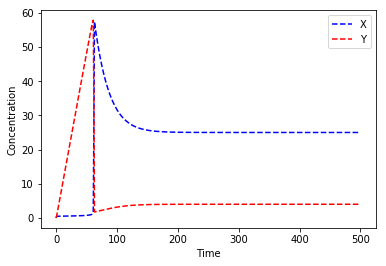

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(c,t):
    x = c[0]
    y = c[1]
    dxdt = 1 - (2.04 * x) + (0.02 * x * x * y)
    dydt = (2 * x) - (0.02 * x * x * y)
    return [dxdt, dydt]

# integrate the equations
t = np.linspace(0, 500, 500) # times to report solution
y = odeint(f, [0,0], t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b--')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(['X','Y'])
plt.show()

As can be seen, Y's concentration is increasing until it combines with a high concentration of X, as a result of which Y's concentration drops drastically. X stabilises around concentration 25 and Y stabilises around 5. The graph shows that X is used to control Y.

## Task 3
**Write a Gillespie algorithm to simulate the same four chemical equations and plot the results for 500 time units (note that this is a lot of data to plot and you might want to save and plot the data only after X or Y have changed in number by at least 5.** 

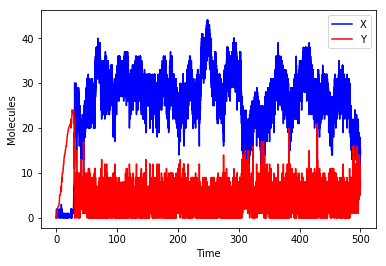

In [4]:
import random as r
import math

def init():
    pass

def r1():
    mol["X"] += 1

def r2():
    mol["X"] -= 1
    mol["Y"] += 1

def r3():
    mol["X"] -= 2
    mol["Y"] -= 1
    mol["X"] += 3

def r4():
    mol["X"] -= 1
    
def addChange(t):
    countAtT.append([t, mol["X"], mol["Y"]])
    
def getWeightsTotal():
    w = [1, 
         2 * mol['X'], 
         0.02 * ((mol['X'] * mol['X']) * mol['Y']), 
         0.04 * mol['X']]
    wT = sum(w)
    return wT

def getWeights():
    w = [1, 
         2 * mol['X'], 
         0.02 * ((mol['X'] * mol['X']) * mol['Y']), 
         0.04 * mol['X']]
    wT = sum(w)
    return [wi/wT for wi in w]

reactions = [r1, r2, r3, r4]
molecules = ["X", "Y"]
mol = {z : 0 for z in molecules}

countAtT = []
T = 500
t = 0
dt = 0

next_reaction = init
while t < T:
    dt = -math.log(r.uniform(0.0, 1.0)) / getWeightsTotal()
    next_reaction()
    next_reaction = r.choices(population = reactions, weights = getWeights(), k = 1)[0]
    addChange(t)
    t = t + dt
    
plt.plot([x[0] for x in countAtT], [x[1] for x in countAtT], 'b-')
plt.plot([x[0] for x in countAtT], [x[2] for x in countAtT], 'r-')
plt.ylabel('Molecules')
plt.xlabel('Time')
plt.legend(['X','Y'])
plt.show()

The graph looks fairly similar to the one before at the start where Y's concentration is rising up until X combines with it. It looks rather chaotic due to the use of randomness. However, it is still clear that after Y and X have combined, X stays at quite a higher concentration than Y. Since random is used, there are in some cases unusual spikes in the graph where Y's concentration is higher than that of X.

# Author

Signe Rebassoo, sr2u17, ID: 29554896, University of Southampton